In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# European

In [3]:
df_EU = pd.read_csv(r"Cfile")

print(df_EU.head())

          Company Name ISIN Code Ticker Symbol Country of Exchange  \
0               Omv AG       NaN           OMV             Austria   
1           Verbund AG       NaN           VER             Austria   
2       voestalpine AG       NaN           VOE             Austria   
3  Erste Group Bank AG       NaN           EBS             Austria   
4           Umicore SA       NaN           UMI             Belgium   

                   NAICS National Industry Name ROE_score_2025 ROE_score_2024  \
0                          Petroleum Refineries          12.3%          14.9%   
1                   Electric Power Distribution            NaN          26.3%   
2           Steel Foundries (except Investment)            NaN           5.5%   
3                            Commercial Banking            NaN          17.2%   
4  Other Basic Inorganic Chemical Manufacturing           8.7%          12.5%   

  ROE_score_2023 ROE_score_2022 ROE_score_2021  ... EPS_score_2009  \
0          29.6%      

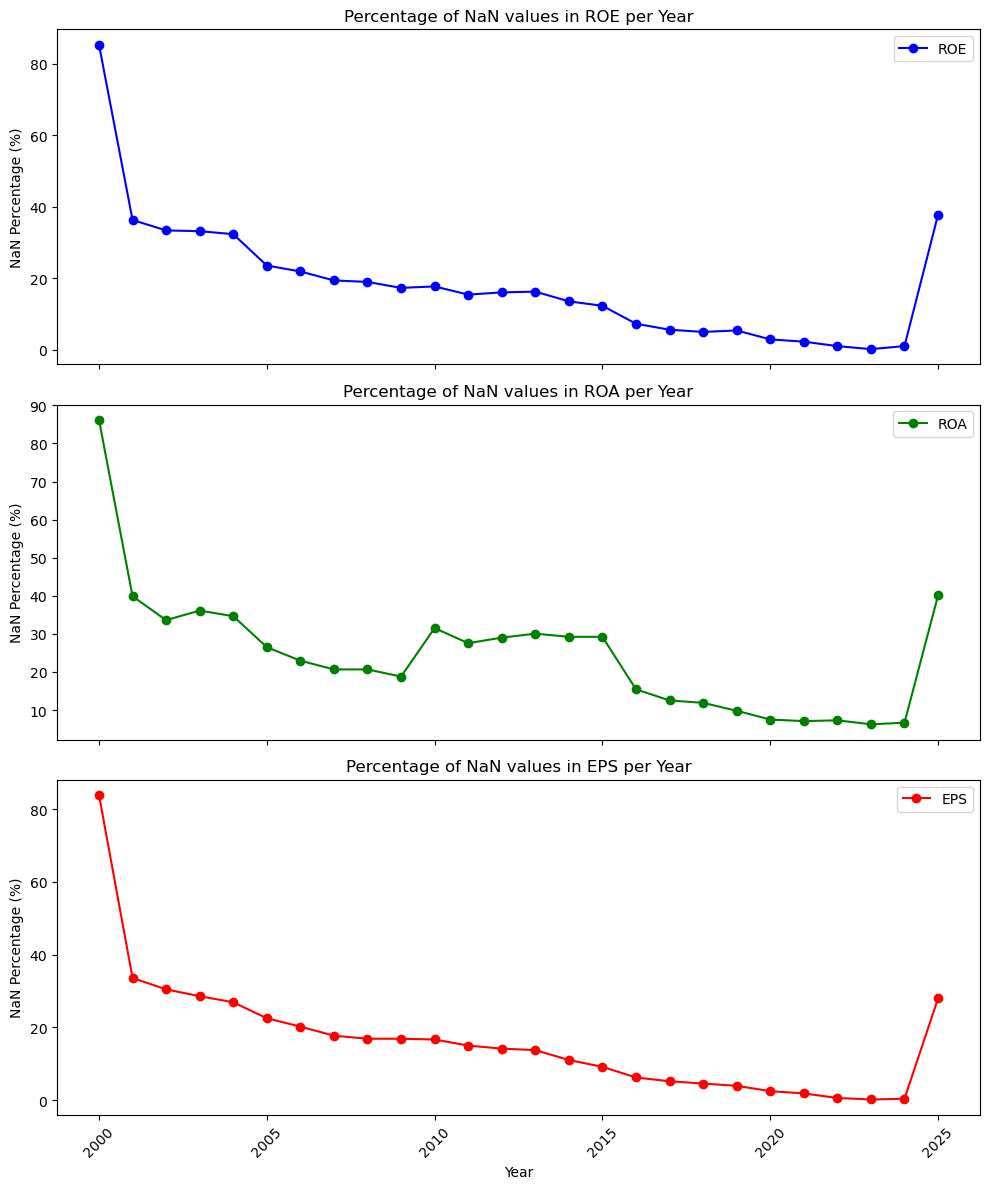

In [7]:
# Extract column names for each financial ratio
roe_cols = [col for col in df_EU.columns if "ROE_score_" in col]
roa_cols = [col for col in df_EU.columns if "ROA_score_" in col]
eps_cols = [col for col in df_EU.columns if "EPS_score_" in col]

# Function to calculate NaN percentage per year
def calculate_nan_percentage(df, cols):
    nan_percentage = df[cols].isna().mean() * 100  # Convert fraction to percentage
    nan_percentage.index = [int(col.split("_")[-1]) for col in cols]  # Extract year as integer
    return nan_percentage.sort_index()  # Sort by year in ascending order

# Compute NaN percentages and sort by year
nan_percentage_roe = calculate_nan_percentage(df_EU, roe_cols)
nan_percentage_roa = calculate_nan_percentage(df_EU, roa_cols)
nan_percentage_eps = calculate_nan_percentage(df_EU, eps_cols)

# Plot the NaN percentages
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

axes[0].plot(nan_percentage_roe.index, nan_percentage_roe, marker='o', linestyle='-', color='b', label='ROE')
axes[0].set_title("Percentage of NaN values in ROE per Year")
axes[0].set_ylabel("NaN Percentage (%)")
axes[0].legend()

axes[1].plot(nan_percentage_roa.index, nan_percentage_roa, marker='o', linestyle='-', color='g', label='ROA')
axes[1].set_title("Percentage of NaN values in ROA per Year")
axes[1].set_ylabel("NaN Percentage (%)")
axes[1].legend()

axes[2].plot(nan_percentage_eps.index, nan_percentage_eps, marker='o', linestyle='-', color='r', label='EPS')
axes[2].set_title("Percentage of NaN values in EPS per Year")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("NaN Percentage (%)")
axes[2].legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



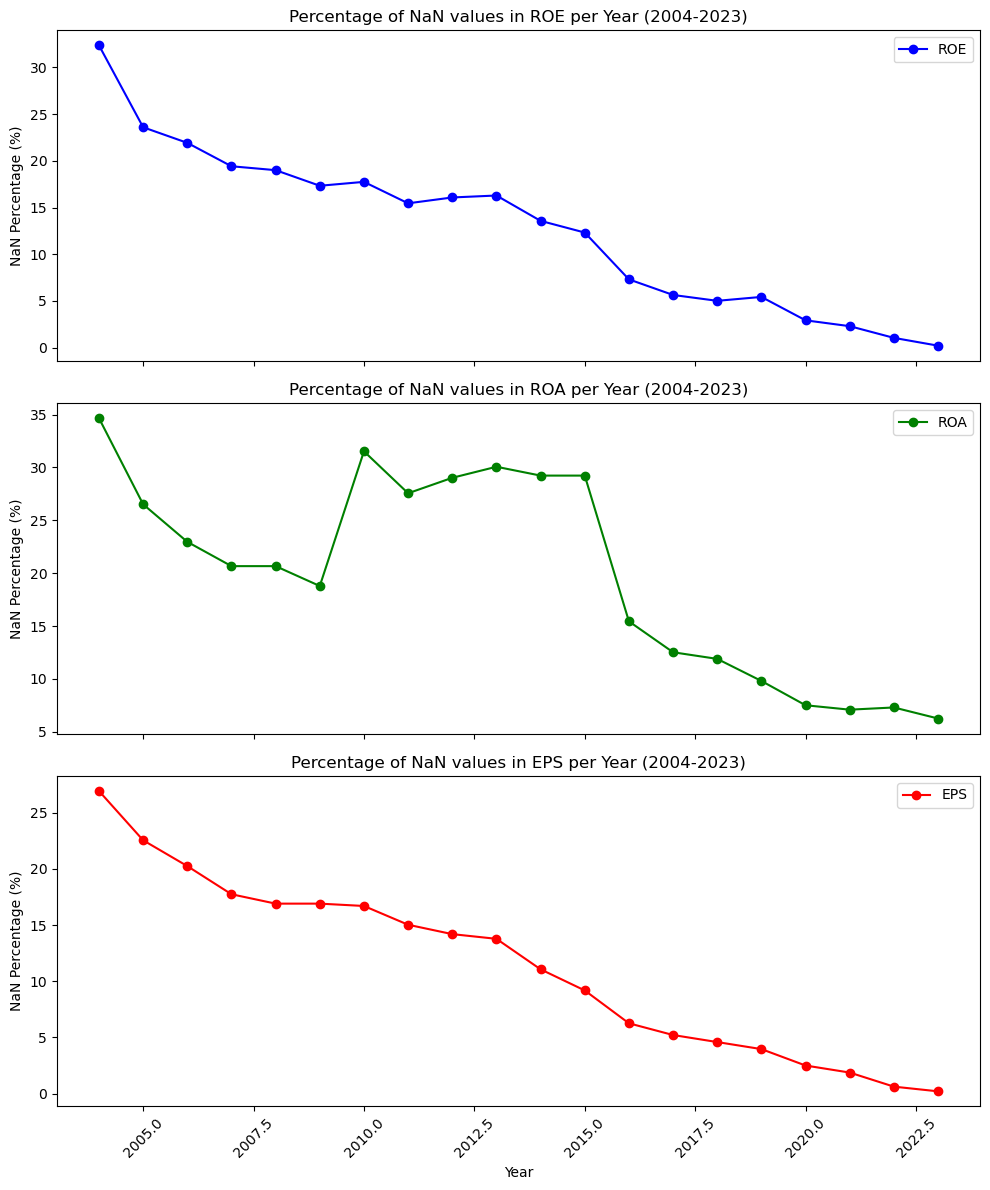

In [9]:
#only 2004 - 2023 data
# Filter columns for years 2004 to 2023
years = list(range(2004, 2024))
roe_cols_filtered = [col for col in roe_cols if int(col.split("_")[-1]) in years]
roa_cols_filtered = [col for col in roa_cols if int(col.split("_")[-1]) in years]
eps_cols_filtered = [col for col in eps_cols if int(col.split("_")[-1]) in years]

# Compute NaN percentages for the filtered years
nan_percentage_roe = calculate_nan_percentage(df_EU, roe_cols_filtered)
nan_percentage_roa = calculate_nan_percentage(df_EU, roa_cols_filtered)
nan_percentage_eps = calculate_nan_percentage(df_EU, eps_cols_filtered)

# Plot the NaN percentages
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

axes[0].plot(nan_percentage_roe.index, nan_percentage_roe, marker='o', linestyle='-', color='b', label='ROE')
axes[0].set_title("Percentage of NaN values in ROE per Year (2004-2023)")
axes[0].set_ylabel("NaN Percentage (%)")
axes[0].legend()

axes[1].plot(nan_percentage_roa.index, nan_percentage_roa, marker='o', linestyle='-', color='g', label='ROA')
axes[1].set_title("Percentage of NaN values in ROA per Year (2004-2023)")
axes[1].set_ylabel("NaN Percentage (%)")
axes[1].legend()

axes[2].plot(nan_percentage_eps.index, nan_percentage_eps, marker='o', linestyle='-', color='r', label='EPS')
axes[2].set_title("Percentage of NaN values in EPS per Year (2004-2023)")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("NaN Percentage (%)")
axes[2].legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# USA

In [11]:
df_USA = pd.read_csv(r"Cfile.csv")

print(df_USA.head())

                     Company Name     ISIN Code ROE_2025 ROE_2024 ROE_2023  \
0                       Aflac Inc  US0010551028    17.4%    16.8%    13.0%   
1             Abbott Laboratories  US0028241000    19.0%    20.7%    26.1%   
2                       Adobe Inc  US00724F1012      NaN    54.1%    48.3%   
3      Advanced Micro Devices Inc  US0079031078     9.6%     7.8%    17.7%   
4  Air Products and Chemicals Inc  US0091581068      NaN    17.7%    18.3%   

  ROE_2022 ROE_2021 ROE_2020 ROE_2019 ROE_2018  ... EPS_2009 EPS_2008  \
0    12.0%    11.4%    12.6%    13.4%    12.1%  ...     2.00     1.64   
1    27.3%    20.5%    18.9%    16.7%    17.1%  ...     3.32     2.84   
2    44.8%    42.8%    41.2%    38.9%    30.9%  ...     1.54     2.07   
3    51.5%    36.4%    36.9%    54.8%    34.9%  ...    -1.67    -2.46   
4    16.6%    15.7%    15.4%    16.6%    15.7%  ...     4.06     4.97   

  EPS_2007 EPS_2006 EPS_2005 EPS_2004 EPS_2003 EPS_2002 EPS_2001 EPS_2000  
0     1.43     1

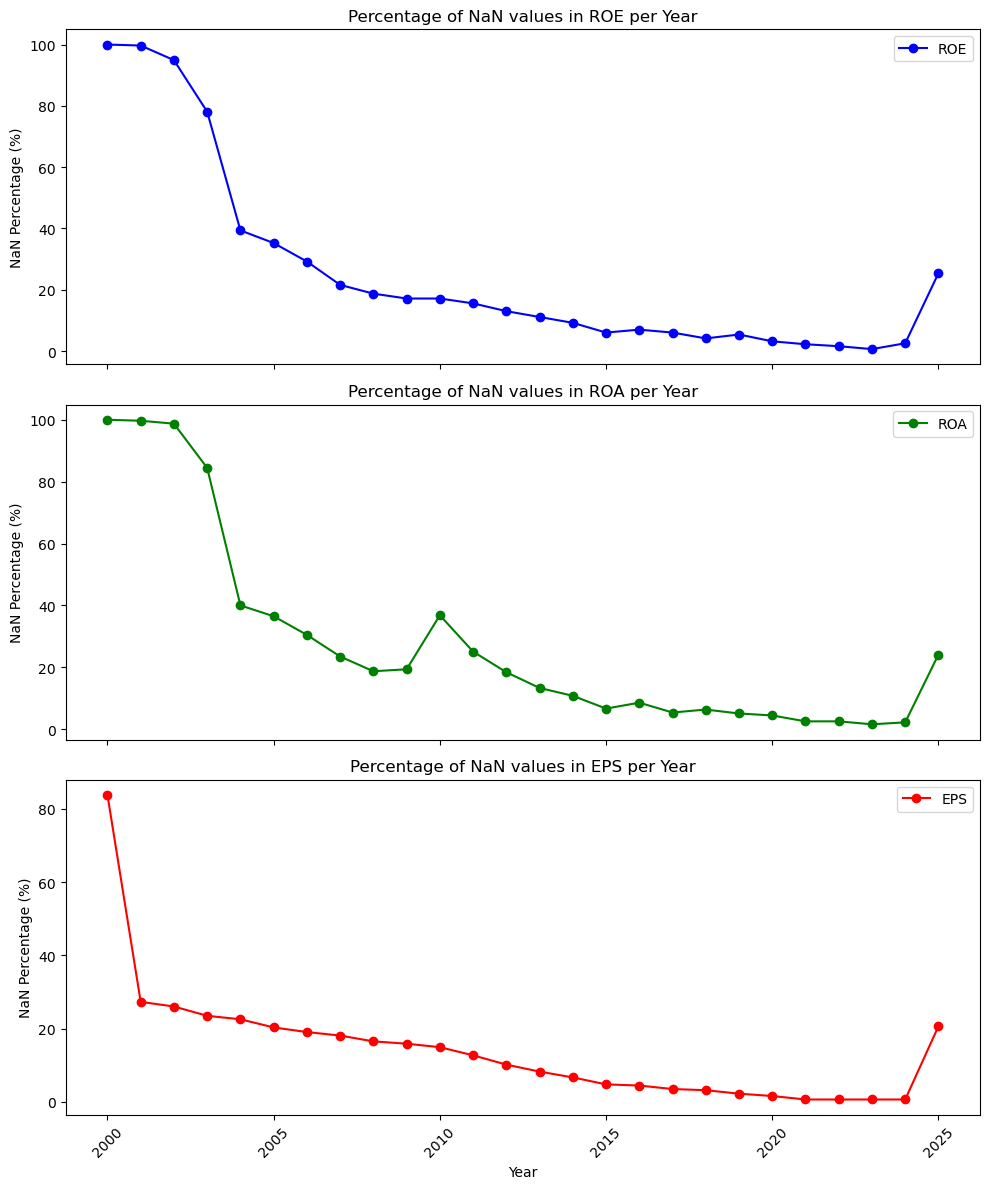

In [13]:
# Extract column names for each financial ratio
roe_cols = [col for col in df_USA.columns if "ROE_" in col]
roa_cols = [col for col in df_USA.columns if "ROA_" in col]
eps_cols = [col for col in df_USA.columns if "EPS_" in col]

# Function to calculate NaN percentage per year
def calculate_nan_percentage(df, cols):
    nan_percentage = df[cols].isna().mean() * 100  # Convert fraction to percentage
    nan_percentage.index = [int(col.split("_")[-1]) for col in cols]  # Extract year as integer
    return nan_percentage.sort_index()  # Sort by year in ascending order

# Compute NaN percentages and sort by year
nan_percentage_roe = calculate_nan_percentage(df_USA, roe_cols)
nan_percentage_roa = calculate_nan_percentage(df_USA, roa_cols)
nan_percentage_eps = calculate_nan_percentage(df_USA, eps_cols)

# Plot the NaN percentages
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

axes[0].plot(nan_percentage_roe.index, nan_percentage_roe, marker='o', linestyle='-', color='b', label='ROE')
axes[0].set_title("Percentage of NaN values in ROE per Year")
axes[0].set_ylabel("NaN Percentage (%)")
axes[0].legend()

axes[1].plot(nan_percentage_roa.index, nan_percentage_roa, marker='o', linestyle='-', color='g', label='ROA')
axes[1].set_title("Percentage of NaN values in ROA per Year")
axes[1].set_ylabel("NaN Percentage (%)")
axes[1].legend()

axes[2].plot(nan_percentage_eps.index, nan_percentage_eps, marker='o', linestyle='-', color='r', label='EPS')
axes[2].set_title("Percentage of NaN values in EPS per Year")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("NaN Percentage (%)")
axes[2].legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

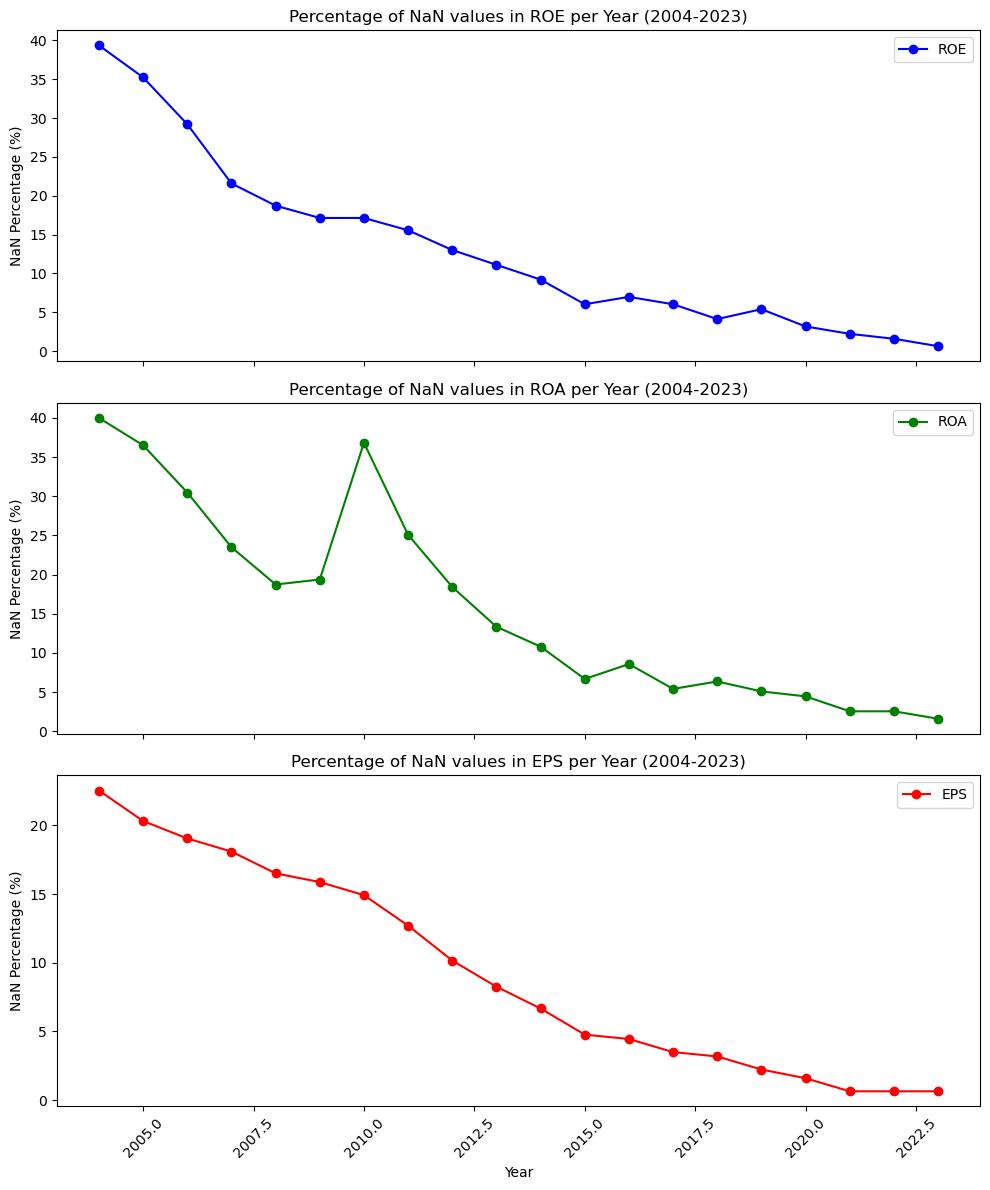

In [15]:
import matplotlib.pyplot as plt

# Filter columns for years 2004 to 2023
years = list(range(2004, 2024))
roe_cols_filtered = [col for col in roe_cols if int(col.split("_")[-1]) in years]
roa_cols_filtered = [col for col in roa_cols if int(col.split("_")[-1]) in years]
eps_cols_filtered = [col for col in eps_cols if int(col.split("_")[-1]) in years]

# Compute NaN percentages for the filtered years
nan_percentage_roe = calculate_nan_percentage(df_USA, roe_cols_filtered)
nan_percentage_roa = calculate_nan_percentage(df_USA, roa_cols_filtered)
nan_percentage_eps = calculate_nan_percentage(df_USA, eps_cols_filtered)

# Plot the NaN percentages
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

axes[0].plot(nan_percentage_roe.index, nan_percentage_roe, marker='o', linestyle='-', color='b', label='ROE')
axes[0].set_title("Percentage of NaN values in ROE per Year (2004-2023)")
axes[0].set_ylabel("NaN Percentage (%)")
axes[0].legend()

axes[1].plot(nan_percentage_roa.index, nan_percentage_roa, marker='o', linestyle='-', color='g', label='ROA')
axes[1].set_title("Percentage of NaN values in ROA per Year (2004-2023)")
axes[1].set_ylabel("NaN Percentage (%)")
axes[1].legend()

axes[2].plot(nan_percentage_eps.index, nan_percentage_eps, marker='o', linestyle='-', color='r', label='EPS')
axes[2].set_title("Percentage of NaN values in EPS per Year (2004-2023)")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("NaN Percentage (%)")
axes[2].legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
# Function to calculate NaN percentage for each company in the given financial ratio columns
def calculate_company_nan_percentage(df, cols):
    nan_percentage = df[cols].isna().mean(axis=1) * 100  # Calculate NaN percentage per company
    return nan_percentage

# Compute NaN percentages per company for ROE, ROA, and EPS
nan_percentage_roe_company = calculate_company_nan_percentage(df_USA, roe_cols)
nan_percentage_roa_company = calculate_company_nan_percentage(df_USA, roa_cols)
nan_percentage_eps_company = calculate_company_nan_percentage(df_USA, eps_cols)

# Add the NaN percentages as columns in the original dataframe
df_USA['NaN_Percentage_ROE'] = nan_percentage_roe_company
df_USA['NaN_Percentage_ROA'] = nan_percentage_roa_company
df_USA['NaN_Percentage_EPS'] = nan_percentage_eps_company

# Get the top 20 companies with highest NaN percentages for each ratio
top_20_roe = df_USA[['Company Name', 'NaN_Percentage_ROE']].sort_values(by='NaN_Percentage_ROE', ascending=False).head(20)
top_20_roa = df_USA[['Company Name', 'NaN_Percentage_ROA']].sort_values(by='NaN_Percentage_ROA', ascending=False).head(20)
top_20_eps = df_USA[['Company Name', 'NaN_Percentage_EPS']].sort_values(by='NaN_Percentage_EPS', ascending=False).head(20)

# Display the tables
print("Top 20 Companies with Highest NaN Percentage in ROE:")
print(top_20_roe)

print("\nTop 20 Companies with Highest NaN Percentage in ROA:")
print(top_20_roa)

print("\nTop 20 Companies with Highest NaN Percentage in EPS:")
print(top_20_eps)


Top 20 Companies with Highest NaN Percentage in ROE:
                                     Company Name  NaN_Percentage_ROE
314                          Smurfit WestRock PLC          100.000000
304  State Street US Government Money Market Fund          100.000000
313                           Otis Worldwide Corp           84.615385
312                           Carrier Global Corp           80.769231
311                                     Amcor PLC           80.769231
310                                   Corteva Inc           76.923077
309                         Uber Technologies Inc           76.923077
308                                       Dow Inc           76.923077
305                                  Dayforce Inc           73.076923
307                                   Moderna Inc           73.076923
303                            Ingersoll Rand Inc           69.230769
302                      Lamb Weston Holdings Inc           69.230769
224                           Global 

In [17]:
# Define the years to filter (2004-2023)
years = list(range(2004, 2024))

# Filter the financial ratio columns for the specified years
roe_cols_filtered = [col for col in roe_cols if int(col.split("_")[-1]) in years]
roa_cols_filtered = [col for col in roa_cols if int(col.split("_")[-1]) in years]
eps_cols_filtered = [col for col in eps_cols if int(col.split("_")[-1]) in years]

# Function to calculate NaN percentage for each company in the given financial ratio columns
def calculate_company_nan_percentage(df, cols):
    nan_percentage = df[cols].isna().mean(axis=1) * 100  # Calculate NaN percentage per company
    return nan_percentage

# Compute NaN percentages per company for the filtered years
nan_percentage_roe_company = calculate_company_nan_percentage(df_USA, roe_cols_filtered)
nan_percentage_roa_company = calculate_company_nan_percentage(df_USA, roa_cols_filtered)
nan_percentage_eps_company = calculate_company_nan_percentage(df_USA, eps_cols_filtered)

# Add the NaN percentages as columns in the original dataframe
df_USA['NaN_Percentage_ROE'] = nan_percentage_roe_company
df_USA['NaN_Percentage_ROA'] = nan_percentage_roa_company
df_USA['NaN_Percentage_EPS'] = nan_percentage_eps_company

# Get the top 10 companies with the highest NaN percentages for each ratio
top_10_roe = df_USA[['Company Name', 'NaN_Percentage_ROE']].sort_values(by='NaN_Percentage_ROE', ascending=False).head(10)
top_10_roa = df_USA[['Company Name', 'NaN_Percentage_ROA']].sort_values(by='NaN_Percentage_ROA', ascending=False).head(10)
top_10_eps = df_USA[['Company Name', 'NaN_Percentage_EPS']].sort_values(by='NaN_Percentage_EPS', ascending=False).head(10)

# Display the tables
print("Top 10 Companies with Highest NaN Percentage in ROE:")
print(top_10_roe)

print("\nTop 10 Companies with Highest NaN Percentage in ROA:")
print(top_10_roa)

print("\nTop 10 Companies with Highest NaN Percentage in EPS:")
print(top_10_eps)


Top 10 Companies with Highest NaN Percentage in ROE:
                                     Company Name  NaN_Percentage_ROE
314                          Smurfit WestRock PLC               100.0
304  State Street US Government Money Market Fund               100.0
313                           Otis Worldwide Corp                85.0
312                           Carrier Global Corp                85.0
311                                     Amcor PLC                80.0
310                                   Corteva Inc                80.0
309                         Uber Technologies Inc                80.0
308                                       Dow Inc                80.0
305                                  Dayforce Inc                75.0
307                                   Moderna Inc                75.0

Top 10 Companies with Highest NaN Percentage in ROA:
                                     Company Name  NaN_Percentage_ROA
314                          Smurfit WestRock PLC    

# Market Capitalization

# EU

In [19]:
control_EU = pd.read_csv(r"Cfile")

print(control_EU.head())

          Company Name ISIN Code Ticker Symbol Country of Exchange  \
0               Omv AG       NaN           OMV             Austria   
1           Verbund AG       NaN           VER             Austria   
2       voestalpine AG       NaN           VOE             Austria   
3  Erste Group Bank AG       NaN           EBS             Austria   
4           Umicore SA       NaN           UMI             Belgium   

                   NAICS National Industry Name MarketCap_2025  \
0                          Petroleum Refineries            NaN   
1                   Electric Power Distribution            NaN   
2           Steel Foundries (except Investment)            NaN   
3                            Commercial Banking            NaN   
4  Other Basic Inorganic Chemical Manufacturing            NaN   

      MarketCap_2024     MarketCap_2023     MarketCap_2022     MarketCap_2021  \
0  12,651,789,653.36  14,363,983,482.27  16,846,980,060.68  18,583,626,302.95   
1                NaN

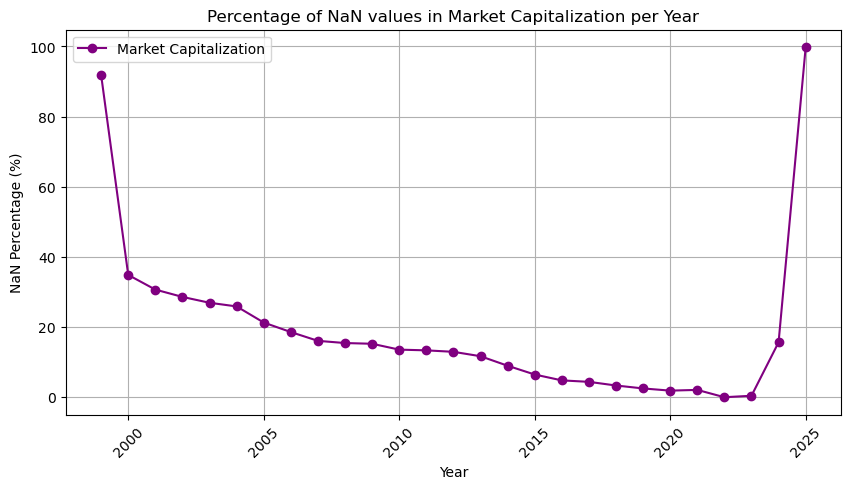

In [23]:
# Extract column names for Market Capitalization
market_cap_cols = [col for col in control_EU.columns if "MarketCap_" in col]

# Function to calculate NaN percentage per year
def calculate_nan_percentage(df, cols):
    nan_percentage = df[cols].isna().mean() * 100  # Convert fraction to percentage
    nan_percentage.index = [int(col.split("_")[-1]) for col in cols]  # Extract year as integer
    return nan_percentage.sort_index()  # Sort by year in ascending order

# Compute NaN percentages for Market Capitalization
nan_percentage_market_cap = calculate_nan_percentage(control_EU, market_cap_cols)

# Plot the NaN percentages
plt.figure(figsize=(10, 5))
plt.plot(nan_percentage_market_cap.index, nan_percentage_market_cap, marker='o', linestyle='-', color='purple', label='Market Capitalization')
plt.title("Percentage of NaN values in Market Capitalization per Year")
plt.xlabel("Year")
plt.ylabel("NaN Percentage (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


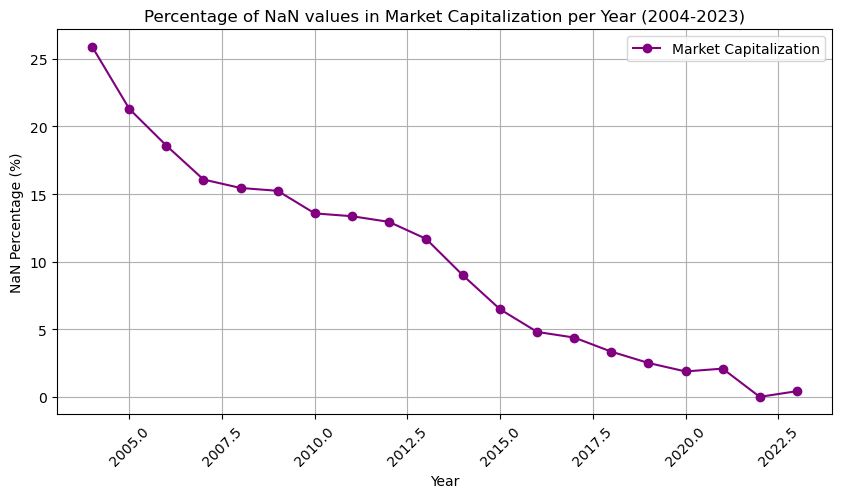

In [25]:
#2004 - 2023

# Define the range of years we want to include
years = list(range(2004, 2024))

# Filter the columns to only include years from 2004 to 2023
market_cap_cols_filtered = [col for col in market_cap_cols if int(col.split("_")[-1]) in years]

# Compute NaN percentages for Market Capitalization using the filtered columns
nan_percentage_market_cap_filtered = calculate_nan_percentage(control_EU, market_cap_cols_filtered)

# Plot the NaN percentages
plt.figure(figsize=(10, 5))
plt.plot(nan_percentage_market_cap_filtered.index, nan_percentage_market_cap_filtered, marker='o', linestyle='-', color='purple', label='Market Capitalization')
plt.title("Percentage of NaN values in Market Capitalization per Year (2004-2023)")
plt.xlabel("Year")
plt.ylabel("NaN Percentage (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


# USA

In [27]:
control_USA = pd.read_csv(r"file")

print(control_USA.head())

                     Company Name     ISIN Code Ticker Symbol  \
0                       Aflac Inc  US0010551028           AFL   
1             Abbott Laboratories  US0028241000           ABT   
2                       Adobe Inc  US00724F1012          ADBE   
3      Advanced Micro Devices Inc  US0079031078           AMD   
4  Air Products and Chemicals Inc  US0091581068           APD   

        Country of Exchange  \
0  United States of America   
1  United States of America   
2  United States of America   
3  United States of America   
4  United States of America   

                        NAICS National Industry Name MarketCap_2025  \
0       Direct Health and Medical Insurance Carriers            NaN   
1  Electromedical and Electrotherapeutic Apparatu...            NaN   
2                                Software Publishers            NaN   
3     Semiconductor and Related Device Manufacturing            NaN   
4                       Industrial Gas Manufacturing            NaN

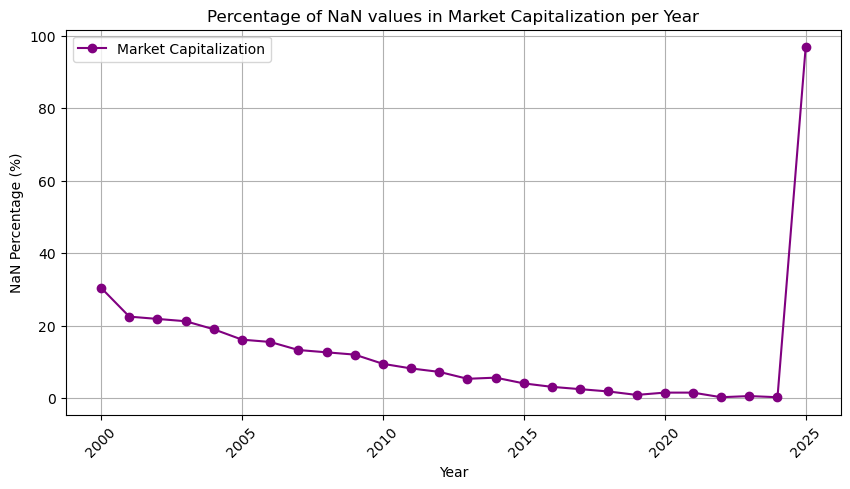

In [29]:
# Extract column names for Market Capitalization
market_cap_cols = [col for col in control_USA.columns if "MarketCap_" in col]

# Function to calculate NaN percentage per year
def calculate_nan_percentage(df, cols):
    nan_percentage = df[cols].isna().mean() * 100  # Convert fraction to percentage
    nan_percentage.index = [int(col.split("_")[-1]) for col in cols]  # Extract year as integer
    return nan_percentage.sort_index()  # Sort by year in ascending order

# Compute NaN percentages for Market Capitalization
nan_percentage_market_cap = calculate_nan_percentage(control_USA, market_cap_cols)

# Plot the NaN percentages
plt.figure(figsize=(10, 5))
plt.plot(nan_percentage_market_cap.index, nan_percentage_market_cap, marker='o', linestyle='-', color='purple', label='Market Capitalization')
plt.title("Percentage of NaN values in Market Capitalization per Year")
plt.xlabel("Year")
plt.ylabel("NaN Percentage (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

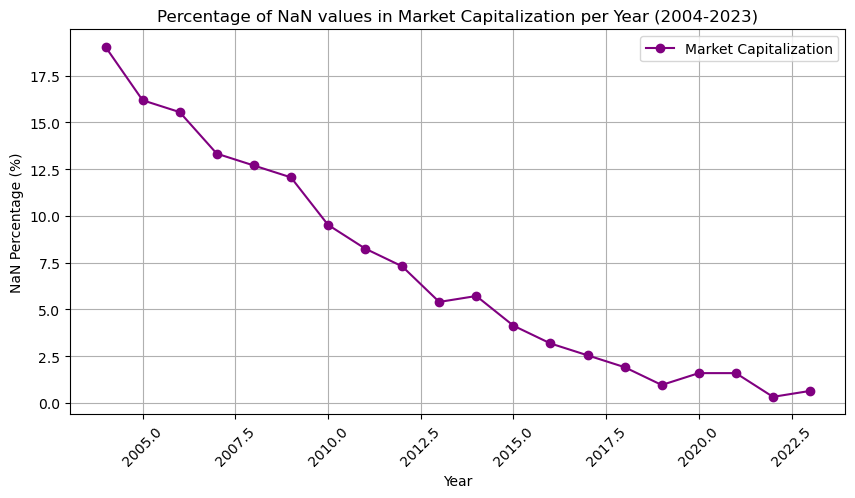

In [31]:
# Define the range of years to include (2004-2023)
years = list(range(2004, 2024))

# Filter the Market Capitalization columns for the specified years
market_cap_cols_filtered = [col for col in market_cap_cols if int(col.split("_")[-1]) in years]

# Compute NaN percentages for Market Capitalization using the filtered columns
nan_percentage_market_cap_filtered = calculate_nan_percentage(control_USA, market_cap_cols_filtered)

# Plot the NaN percentages
plt.figure(figsize=(10, 5))
plt.plot(nan_percentage_market_cap_filtered.index, nan_percentage_market_cap_filtered, marker='o', linestyle='-', color='purple', label='Market Capitalization')
plt.title("Percentage of NaN values in Market Capitalization per Year (2004-2023)")
plt.xlabel("Year")
plt.ylabel("NaN Percentage (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


# One dataset of EU

In [36]:
finance_EU = pd.read_csv(r"file.csv")
control_EU = pd.read_csv(r"file.csv")
ESG_EU = pd.read_csv(r"Cfile.csv")

In [58]:
print(control_EU.columns)

Index(['Company Name', 'ISIN Code', 'Ticker Symbol', 'Country of Exchange',
       'NAICS National Industry Name', 'MarketCap_2025', 'MarketCap_2024',
       'MarketCap_2023', 'MarketCap_2022', 'MarketCap_2021', 'MarketCap_2020',
       'MarketCap_2019', 'MarketCap_2018', 'MarketCap_2017', 'MarketCap_2016',
       'MarketCap_2015', 'MarketCap_2014', 'MarketCap_2013', 'MarketCap_2012',
       'MarketCap_2011', 'MarketCap_2010', 'MarketCap_2009', 'MarketCap_2008',
       'MarketCap_2007', 'MarketCap_2006', 'MarketCap_2005', 'MarketCap_2004',
       'MarketCap_2003', 'MarketCap_2002', 'MarketCap_2001', 'MarketCap_2000',
       'MarketCap_1999'],
      dtype='object')


In [40]:
print(control_EU.head())

          Company Name ISIN Code Ticker Symbol Country of Exchange  \
0               Omv AG       NaN           OMV             Austria   
1           Verbund AG       NaN           VER             Austria   
2       voestalpine AG       NaN           VOE             Austria   
3  Erste Group Bank AG       NaN           EBS             Austria   
4           Umicore SA       NaN           UMI             Belgium   

                   NAICS National Industry Name MarketCap_2025  \
0                          Petroleum Refineries            NaN   
1                   Electric Power Distribution            NaN   
2           Steel Foundries (except Investment)            NaN   
3                            Commercial Banking            NaN   
4  Other Basic Inorganic Chemical Manufacturing            NaN   

      MarketCap_2024     MarketCap_2023     MarketCap_2022     MarketCap_2021  \
0  12,651,789,653.36  14,363,983,482.27  16,846,980,060.68  18,583,626,302.95   
1                NaN

In [42]:
print(ESG_EU.head())

          Company Name ISIN Code Ticker Symbol Country of Exchange  \
0               Omv AG       NaN           OMV             Austria   
1           Verbund AG       NaN           VER             Austria   
2       voestalpine AG       NaN           VOE             Austria   
3  Erste Group Bank AG       NaN           EBS             Austria   
4           Umicore SA       NaN           UMI             Belgium   

                   NAICS National Industry Name  ESG_score_2024  \
0                          Petroleum Refineries             NaN   
1                   Electric Power Distribution             NaN   
2           Steel Foundries (except Investment)           70.77   
3                            Commercial Banking             NaN   
4  Other Basic Inorganic Chemical Manufacturing             NaN   

   ESG_score_2023  ESG_score_2022  ESG_score_2021  ESG_score_2020  ...  \
0           83.85           82.30           83.87           81.26  ...   
1           62.66           

In [60]:
# Load datasets
finance_EU = pd.read_csv(r"C:file.csv")
control_EU = pd.read_csv(r"C:file.csv")
ESG_EU = pd.read_csv(r"Cfile.csv")

# Define the common keys for merging
merge_keys = ['Company Name', 'ISIN Code', 'Ticker Symbol', 'Country of Exchange', 'NAICS National Industry Name']

# Merge the datasets
merged_EU = finance_EU.merge(control_EU, on=merge_keys, how='outer')\
                      .merge(ESG_EU, on=merge_keys, how='outer')

# Define the desired column order
company_info_cols = merge_keys  # First the company information
market_cap_cols = [col for col in control_EU.columns if "MarketCap_" in col]  # Market Capitalization
esg_cols = [col for col in ESG_EU.columns if col not in merge_keys]  # ESG information
finance_cols = [col for col in finance_EU.columns if col not in merge_keys]  # Financial information

# Reorder the columns
final_column_order = company_info_cols + market_cap_cols + esg_cols + finance_cols
merged_EU = merged_EU[final_column_order]

# Save merged dataset
merged_EU.to_csv(r"Cfile.csv", index=False)

print("Merging completed. File saved as 'EU_merged.csv'.")


Merging completed. File saved as 'EU_merged.csv'.


In [62]:
# Export to Excel
merged_EU.to_excel('merged_EU_readable.xlsx', index=False, engine='openpyxl')

# One dataset of USA

In [70]:
finance_USA = pd.read_csv(r"C:\file.csv")
control_USA = pd.read_csv(r"C:\file.csv")
ESG_USA = pd.read_csv(r"Cfile.csv")


In [72]:
print(finance_USA.head())

                     Company Name     ISIN Code ROE_2025 ROE_2024 ROE_2023  \
0                       Aflac Inc  US0010551028    17.4%    16.8%    13.0%   
1             Abbott Laboratories  US0028241000    19.0%    20.7%    26.1%   
2                       Adobe Inc  US00724F1012      NaN    54.1%    48.3%   
3      Advanced Micro Devices Inc  US0079031078     9.6%     7.8%    17.7%   
4  Air Products and Chemicals Inc  US0091581068      NaN    17.7%    18.3%   

  ROE_2022 ROE_2021 ROE_2020 ROE_2019 ROE_2018  ... EPS_2009 EPS_2008  \
0    12.0%    11.4%    12.6%    13.4%    12.1%  ...     2.00     1.64   
1    27.3%    20.5%    18.9%    16.7%    17.1%  ...     3.32     2.84   
2    44.8%    42.8%    41.2%    38.9%    30.9%  ...     1.54     2.07   
3    51.5%    36.4%    36.9%    54.8%    34.9%  ...    -1.67    -2.46   
4    16.6%    15.7%    15.4%    16.6%    15.7%  ...     4.06     4.97   

  EPS_2007 EPS_2006 EPS_2005 EPS_2004 EPS_2003 EPS_2002 EPS_2001 EPS_2000  
0     1.43     1

In [74]:
print(control_USA.head())

                     Company Name     ISIN Code Ticker Symbol  \
0                       Aflac Inc  US0010551028           AFL   
1             Abbott Laboratories  US0028241000           ABT   
2                       Adobe Inc  US00724F1012          ADBE   
3      Advanced Micro Devices Inc  US0079031078           AMD   
4  Air Products and Chemicals Inc  US0091581068           APD   

        Country of Exchange  \
0  United States of America   
1  United States of America   
2  United States of America   
3  United States of America   
4  United States of America   

                        NAICS National Industry Name MarketCap_2025  \
0       Direct Health and Medical Insurance Carriers            NaN   
1  Electromedical and Electrotherapeutic Apparatu...            NaN   
2                                Software Publishers            NaN   
3     Semiconductor and Related Device Manufacturing            NaN   
4                       Industrial Gas Manufacturing            NaN

In [76]:
print(ESG_USA.head())

                     Company Name     ISIN Code Ticker Symbol  \
0                       Aflac Inc  US0010551028           AFL   
1             Abbott Laboratories  US0028241000           ABT   
2                       Adobe Inc  US00724F1012          ADBE   
3      Advanced Micro Devices Inc  US0079031078           AMD   
4  Air Products and Chemicals Inc  US0091581068           APD   

        Country of Exchange  \
0  United States of America   
1  United States of America   
2  United States of America   
3  United States of America   
4  United States of America   

                        NAICS National Industry Name  ESG_score_2024  \
0       Direct Health and Medical Insurance Carriers             NaN   
1  Electromedical and Electrotherapeutic Apparatu...             NaN   
2                                Software Publishers             NaN   
3     Semiconductor and Related Device Manufacturing             NaN   
4                       Industrial Gas Manufacturing          

In [80]:
print("Finance columns:", finance_USA.columns)
print("Control columns:", control_USA.columns)
print("ESG columns:", ESG_USA.columns)


Finance columns: Index(['Company Name', 'ISIN Code', 'ROE_2025', 'ROE_2024', 'ROE_2023',
       'ROE_2022', 'ROE_2021', 'ROE_2020', 'ROE_2019', 'ROE_2018', 'ROE_2017',
       'ROE_2016', 'ROE_2015', 'ROE_2014', 'ROE_2013', 'ROE_2012', 'ROE_2011',
       'ROE_2010', 'ROE_2009', 'ROE_2008', 'ROE_2007', 'ROE_2006', 'ROE_2005',
       'ROE_2004', 'ROE_2003', 'ROE_2002', 'ROE_2001', 'ROE_2000', 'ROA_2025',
       'ROA_2024', 'ROA_2023', 'ROA_2022', 'ROA_2021', 'ROA_2020', 'ROA_2019',
       'ROA_2018', 'ROA_2017', 'ROA_2016', 'ROA_2015', 'ROA_2014', 'ROA_2013',
       'ROA_2012', 'ROA_2011', 'ROA_2010', 'ROA_2009', 'ROA_2008', 'ROA_2007',
       'ROA_2006', 'ROA_2005', 'ROA_2004', 'ROA_2003', 'ROA_2002', 'ROA_2001',
       'ROA_2000', 'EPS_2025', 'EPS_2024', 'EPS_2023', 'EPS_2022', 'EPS_2021',
       'EPS_2020', 'EPS_2019', 'EPS_2018', 'EPS_2017', 'EPS_2016', 'EPS_2015',
       'EPS_2014', 'EPS_2013', 'EPS_2012', 'EPS_2011', 'EPS_2010', 'EPS_2009',
       'EPS_2008', 'EPS_2007', 'EPS_2006',

In [82]:

# Load datasets
finance_USA = pd.read_csv(r"C:file.csv")
control_USA = pd.read_csv(r"C:file.csv")
ESG_USA = pd.read_csv(r"C:\file.csv")

# Merge on common columns: Company Name and ISIN Code
merged_USA = finance_USA.merge(control_USA, on=['Company Name', 'ISIN Code'], how='outer')\
                        .merge(ESG_USA, on=['Company Name', 'ISIN Code'], how='outer')

# Define the column order for the final dataset
company_info_cols = ['Company Name', 'ISIN Code']  # Always keep Company Name and ISIN Code
market_cap_cols = [col for col in control_USA.columns if 'MarketCap_' in col]
esg_cols = [col for col in ESG_USA.columns if col not in company_info_cols]  # Exclude 'Company Name' and 'ISIN Code'
finance_cols = [col for col in finance_USA.columns if col not in company_info_cols]  # Exclude 'Company Name' and 'ISIN Code'

# Reorder the columns based on available data
final_column_order = company_info_cols + market_cap_cols + esg_cols + finance_cols
merged_USA = merged_USA[[col for col in final_column_order if col in merged_USA.columns]]

# Save the merged dataset
merged_USA.to_csv(r"C:file.csv", index=False)

print("Merging completed. File saved as 'USA_merged.csv'.")


Merging completed. File saved as 'USA_merged.csv'.


In [84]:
# Export to Excel
merged_USA.to_excel('merged_USA_readable.xlsx', index=False, engine='openpyxl')

In [86]:
print("Finance columns:", merged_EU.columns)

Finance columns: Index(['Company Name', 'ISIN Code', 'Ticker Symbol', 'Country of Exchange',
       'NAICS National Industry Name', 'MarketCap_2025', 'MarketCap_2024',
       'MarketCap_2023', 'MarketCap_2022', 'MarketCap_2021',
       ...
       'EPS_score_2009', 'EPS_score_2008', 'EPS_score_2007', 'EPS_score_2006',
       'EPS_score_2005', 'EPS_score_2004', 'EPS_score_2003', 'EPS_score_2002',
       'EPS_score_2001', 'EPS_score_2000'],
      dtype='object', length=245)


In [98]:
print("Finance columns:", merged_USA.columns)

Finance columns: Index(['Company Name', 'ISIN Code', 'ROE_2025', 'ROE_2024', 'ROE_2023',
       'ROE_2022', 'ROE_2021', 'ROE_2020', 'ROE_2019', 'ROE_2018', 'ROE_2017',
       'ROE_2016', 'ROE_2015', 'ROE_2014', 'ROE_2013', 'ROE_2012', 'ROE_2011',
       'ROE_2010', 'ROE_2009', 'ROE_2008', 'ROE_2007', 'ROE_2006', 'ROE_2005',
       'ROE_2004', 'ROE_2003', 'ROE_2002', 'ROE_2001', 'ROE_2000', 'ROA_2025',
       'ROA_2024', 'ROA_2023', 'ROA_2022', 'ROA_2021', 'ROA_2020', 'ROA_2019',
       'ROA_2018', 'ROA_2017', 'ROA_2016', 'ROA_2015', 'ROA_2014', 'ROA_2013',
       'ROA_2012', 'ROA_2011', 'ROA_2010', 'ROA_2009', 'ROA_2008', 'ROA_2007',
       'ROA_2006', 'ROA_2005', 'ROA_2004', 'ROA_2003', 'ROA_2002', 'ROA_2001',
       'ROA_2000', 'EPS_2025', 'EPS_2024', 'EPS_2023', 'EPS_2022', 'EPS_2021',
       'EPS_2020', 'EPS_2019', 'EPS_2018', 'EPS_2017', 'EPS_2016', 'EPS_2015',
       'EPS_2014', 'EPS_2013', 'EPS_2012', 'EPS_2011', 'EPS_2010', 'EPS_2009',
       'EPS_2008', 'EPS_2007', 'EPS_2006',

In [92]:
# Load datasets
finance_USA = pd.read_csv(r"C:file.csv")
control_USA = pd.read_csv(r"C:file.csv")
ESG_USA = pd.read_csv(r"C:file.csv")

# Merge on common columns: Company Name and ISIN Code
merged_USA = finance_USA.merge(control_USA, on=['Company Name', 'ISIN Code'], how='outer')\
                        .merge(ESG_USA, on=['Company Name', 'ISIN Code'], how='outer')

# Define the column order for the final dataset
company_info_cols = ['Company Name', 'ISIN Code', 'Ticker Symbol', 'Country of Exchange', 'NAICS National Industry Name']  # Add Ticker Symbol, Country of Exchange, and NAICS
market_cap_cols = [col for col in control_USA.columns if 'MarketCap_' in col]
esg_cols = [col for col in ESG_USA.columns if col not in company_info_cols]  # Exclude 'Company Name', 'ISIN Code', and other company info columns
finance_cols = [col for col in finance_USA.columns if col not in company_info_cols]  # Exclude 'Company Name', 'ISIN Code', and other company info columns

# Reorder the columns based on available data
final_column_order = company_info_cols + market_cap_cols + esg_cols + finance_cols
merged_USA = merged_USA[[col for col in final_column_order if col in merged_USA.columns]]



In [96]:
# Load datasets
finance_USA = pd.read_csv(r"C:\file.csv")
control_USA = pd.read_csv(r"C:\file.csv")
ESG_USA = pd.read_csv(r"C:\file.csv")

# Merge all three datasets on 'Company Name' and 'ISIN Code'
merged_USA = finance_USA.merge(control_USA[['Company Name', 'ISIN Code', 'Ticker Symbol', 'Country of Exchange', 'NAICS National Industry Name']], 
                               on=['Company Name', 'ISIN Code'], how='outer')\
                        .merge(ESG_USA[['Company Name', 'ISIN Code', 'Ticker Symbol', 'Country of Exchange', 'NAICS National Industry Name']], 
                               on=['Company Name', 'ISIN Code'], how='outer')

# Define the column order for the final dataset
company_info_cols = ['Company Name', 'ISIN Code', 'Ticker Symbol', 'Country of Exchange', 'NAICS National Industry Name']
market_cap_cols = [col for col in control_USA.columns if 'MarketCap_' in col]
esg_cols = [col for col in ESG_USA.columns if col not in company_info_cols]  # Exclude 'Company Name', 'ISIN Code', and other company info columns
finance_cols = [col for col in finance_USA.columns if col not in company_info_cols]  # Exclude 'Company Name', 'ISIN Code', and other company info columns

# Reorder the columns based on available data
final_column_order = company_info_cols + market_cap_cols + esg_cols + finance_cols
merged_USA = merged_USA[[col for col in final_column_order if col in merged_USA.columns]]

